In [1]:
import numpy as np
import pandas as pd

In [2]:
#>>>RUN: L1.2-slides

from IPython.display import IFrame

IFrame(src='https://mitx-8s50.github.io/slides/L01/slides1.html', width=975, height=550)

Esperanza

In [3]:
nsamples = 10000
bkg = np.random.uniform(0,10,nsamples)

#mean
mean= 0
prob= 1./nsamples
for x in bkg:
    mean+= x*prob
print('Mean:', mean)

var = 0

for x in bkg:
    var+= (x - mean)*(x - mean)*prob
print('Var:', var)

#Now we can do it the fast way, using intrinsic numpy functions
print("Mean:",bkg.mean(),"Variance:",bkg.var())

Mean: 4.9709455480791895
Var: 8.350367171893385
Mean: 4.970945548079195 Variance: 8.350367171893405


In [4]:
import matplotlib.pyplot as plt    #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import scipy.stats as stats        #https://docs.scipy.org/doc/scipy/reference/stats.html
import csv  

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
#>>>FOLLOW-UP: L1.4.1a
# Use this cell for drafting your solution (if desired)

def mean(start, end, num_points):
    mean_val = 0 # your code here
    point = np.random.normal(start, end, num_points)
    probx = 1/num_points
    for x in point:
        mean_val += x*probx
    return mean_val

def variance(start, end, num_points):
    var_val = 0 # your code here
    point = np.random.normal(start,end, num_points)
    probx = 1/num_points
    mean_val = mean(start, end, num_points)
    for x in point:
        var_val += (x-mean_val)*(x-mean_val)*probx
    return var_val

In [6]:
mean(0,5,100)

-0.1705925526119106

In [7]:
bk = np.random.normal(0,5,100)

In [8]:
bk.mean()

-0.2402292765314512

In [9]:
type(bk)

numpy.ndarray

In [10]:
#>>>EXERCISE: L1.4.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

import numpy as np

# Sample from uniform distributions in [0,2], [0,5], [0,10], [0,20]
samples_list = [np.random.uniform(0, upper, 1000) for upper in [2, 5, 10, 20]] # Python list compr. syntax

# Get a list of tuples of (mean, variance)
means_vars = [(point.mean(), point.var()) for point in samples_list] #YOUR CODE HERE

# Print results
for mean, variance in means_vars:
    print(f"Mean: {mean}, Variance: {variance}")

Mean: 1.0568509436069506, Variance: 0.31995409473048986
Mean: 2.528163190131615, Variance: 2.0508280706589486
Mean: 4.895689621820472, Variance: 8.791521107256594
Mean: 10.047471117025154, Variance: 33.42313041245231


## *L1.5*

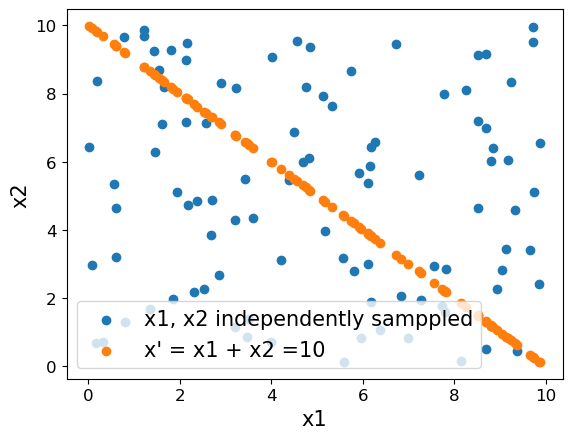

In [13]:
bkg1 = np.random.uniform(0,10,100)
bkg2 = np.random.uniform(0,10,100)

data = bkg1 + bkg2

val = 10-bkg1

plt.scatter(bkg1, bkg2, label='x1, x2 independently samppled')
plt.scatter(bkg1, val, label="x' = x1 + x2 =10")

plt.legend(fontsize=15)
plt.xlabel('x1', fontsize=15)
plt.ylabel('x2', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

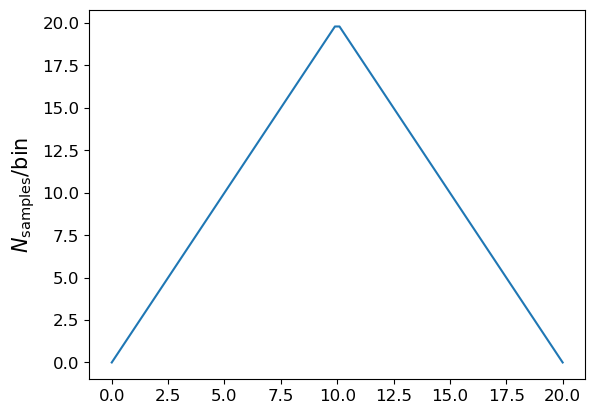

In [17]:

nsamples = 1000
bkg1 = np.random.uniform(0,10,nsamples)
bkg2 = np.random.uniform(0,10,nsamples)

data = bkg1 + bkg2
nbins = 100

histy, bin_edges = np.histogram(data, bins=nbins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

def fun1(ix,ntot=nsamples,inbins=nbins):
    if ix < 10:
        return ntot*(20/inbins)*(ix/100)
    else:
        return ntot*(20/inbins)*(20-ix)/100
    
def fun2(ix,ntot=nsamples,inbins=nbins):
    return np.where(ix < 10, ntot*(20/inbins)*(ix/100),ntot*(20/inbins)*(20-ix)/100 )

x = np.linspace(start=0, stop=20, num=100)
y = fun2(x)

plt.plot(x, y, label='analitic PDF')
plt.ylabel('$N_\mathrm{samples}$/bin', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()